In [1]:
# Import the necessary libraries
import os
import pandas as pd
import numpy as np
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from wordcloud import WordCloud
import random
import matplotlib.image as mpimg 

In [2]:
# Load the Amazon Review dataset
product_data = pd.read_json('meta_AMAZON_FASHION.json', lines=True)
user_data = pd.read_json('AMAZON_FASHION.json', lines=True)

## Data exploration

In [33]:
product_data.head()

title                   brand  \
0  Slime Time Fall Fest [With CDROM and Collector...   Group Publishing (CO)   
1  XCC Qi promise new spider snake preparing men'...                     NaN   
2                 Magical Things I Really Do Do Too!       Christopher Manos   
3                 Ashes to Ashes, Oranges to Oranges  Flickerlamp Publishing   
4  Aether & Empire #1 - 2016 First Printing Comic...                     NaN   

                                             feature  \
0  [Product Dimensions:\n                    \n8....   
1                                                NaN   
2  [Package Dimensions:\n                    \n8....   
3  [Package Dimensions:\n                    \n8....   
4  [Package Dimensions:\n                    \n10...   

                                     rank         date        asin  \
0  13,052,976inClothing,Shoesamp;Jewelry(  8.70 inches  0764443682   
1  11,654,581inClothing,Shoesamp;Jewelry(       5 star  1291691480   
2      19,308,073inClothing,ShoesJewelry(       5 star  1940280001   
3      19,734,184inClothing,ShoesJewelry(       5 star  1940735033   
4  10,558,646inClothing,Shoesamp;Jewelry(       5 star  1940967805   

                                            imageURL  \
0  [https://images-na.ssl-images-amazon.com/image...   
1  [https://images-na.ssl-images-amazon.com/image...   
2  [https://images-na.ssl-images-amazon.com/image...   
3  [https://images-na.ssl-images-amazon.com/image...   
4  [https://images-na.ssl-images-amazon.com/image...   

                                     imageURLHighRes  \
0  [https://images-na.ssl-images-amazon.com/image...   
1  [https://images-na.ssl-images-amazon.com/image...   
2  [https://images-na.ssl-images-amazon.com/image...   
3  [https://images-na.ssl-images-amazon.com/image...   
4  [https://images-na.ssl-images-amazon.com/image...   

                                         description  price also_view  \
0                                                NaN    NaN       NaN   
1                                                NaN    NaN       NaN   
2  [For the professional or amateur magician.  Ro...    NaN       NaN   
3                                                NaN    NaN       NaN   
4                                                NaN  $4.50       NaN   

  also_buy  fit details similar_item tech1  
0      NaN  NaN     NaN          NaN   NaN  
1      NaN  NaN     NaN          NaN   NaN  
2      NaN  NaN     NaN          NaN   NaN  
3      NaN  NaN     NaN          NaN   NaN  
4      NaN  NaN     NaN          NaN   NaN

In [4]:
user_data.head()

overall  verified   reviewTime      reviewerID        asin  reviewerName  \
0        5      True  10 20, 2014  A1D4G1SNUZWQOT  7106116521         Tracy   
1        2      True  09 28, 2014  A3DDWDH9PX2YX2  7106116521     Sonja Lau   
2        4     False  08 25, 2014  A2MWC41EW7XL15  7106116521      Kathleen   
3        2      True  08 24, 2014  A2UH2QQ275NV45  7106116521   Jodi Stoner   
4        3     False  07 27, 2014   A89F3LQADZBS5  7106116521  Alexander D.   

                                          reviewText  \
0                             Exactly what I needed.   
1  I agree with the other review, the opening is ...   
2  Love these... I am going to order another pack...   
3                                too tiny an opening   
4                                               Okay   

                                             summary  unixReviewTime  vote  \
0                             perfect replacements!!      1413763200   NaN   
1  I agree with the other review, the opening is ...      1411862400   3.0   
2                                My New 'Friends' !!      1408924800   NaN   
3                                          Two Stars      1408838400   NaN   
4                                        Three Stars      1406419200   NaN   

  style image  
0   NaN   NaN  
1   NaN   NaN  
2   NaN   NaN  
3   NaN   NaN  
4   NaN   NaN

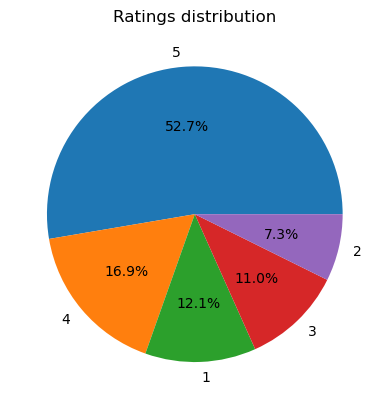

Average rating: 3.9069401880412298


In [34]:
rating_counts = user_data['overall'].value_counts() 
plt.pie(rating_counts, labels=rating_counts.index,autopct='%1.1f%%')
plt.title('Ratings distribution')
plt.show()

print('Average rating:',user_data['overall'].mean())

Text(0.5, 1.0, 'Sentiment count plot')

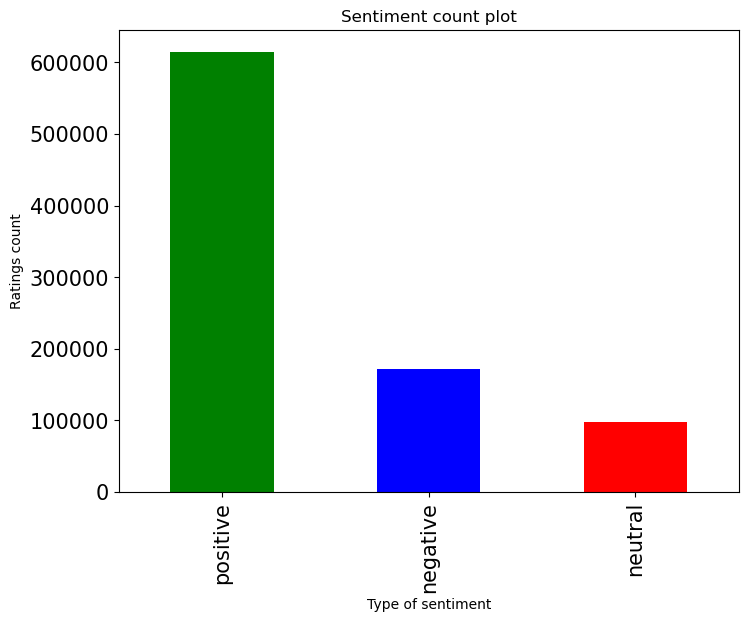

In [6]:
## converting values to 0 and 1 bssed on rating 
## 1 represents positive and 0 represents negative rating 
df2 = user_data.copy()
df2['overall'] = df2['overall'].apply(lambda x : "positive" if x == 5 or x ==4 else "neutral"if x == 3 else "negative")
df2['overall'].value_counts().plot(kind = "bar", color = ["green","blue", "red"],fontsize = 15, figsize = (8,6))
plt.ylabel("Ratings count")
plt.xlabel("Type of sentiment")
plt.title("Sentiment count plot")

## Word Cloud for reviews

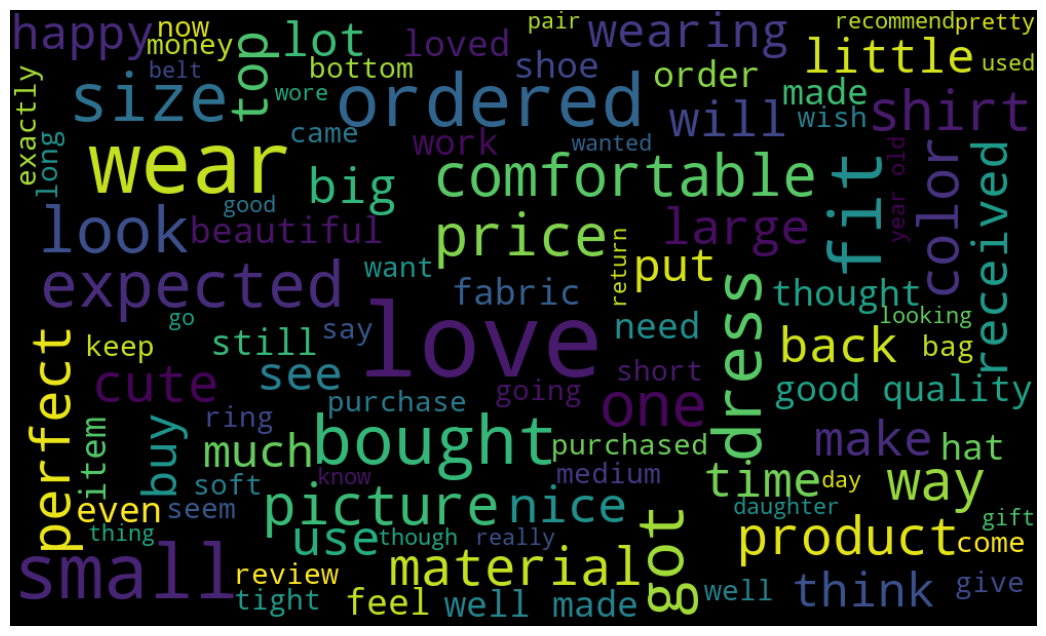

In [7]:
all_review = user_data[['reviewText']].dropna()

txt = ' '.join(rev for rev in all_review.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

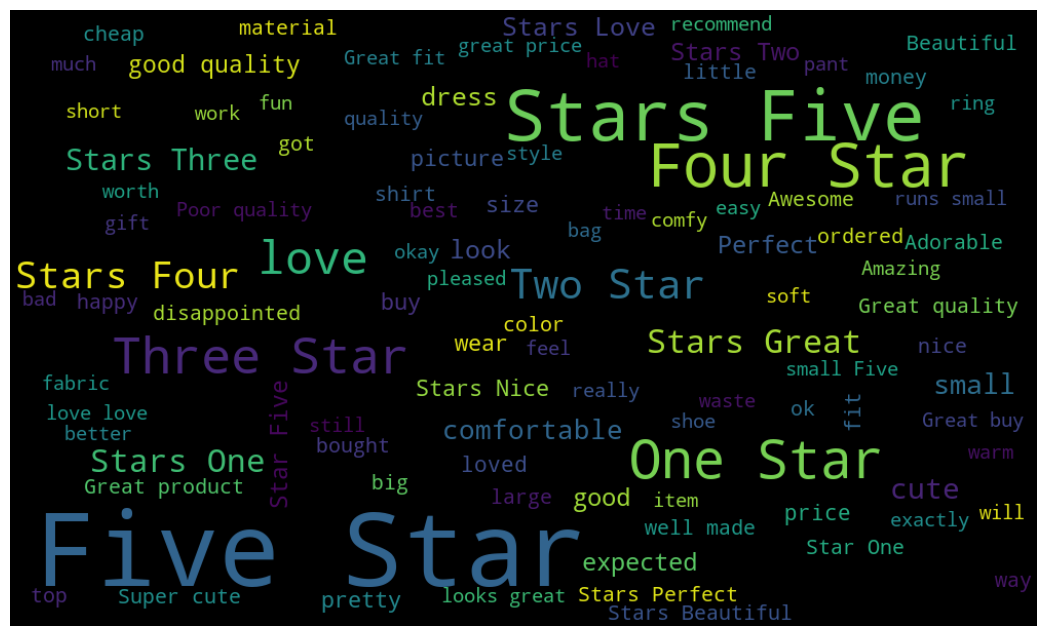

In [8]:
all_summary = user_data[['summary']].dropna()

txt = ' '.join(rev for rev in all_summary.summary)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

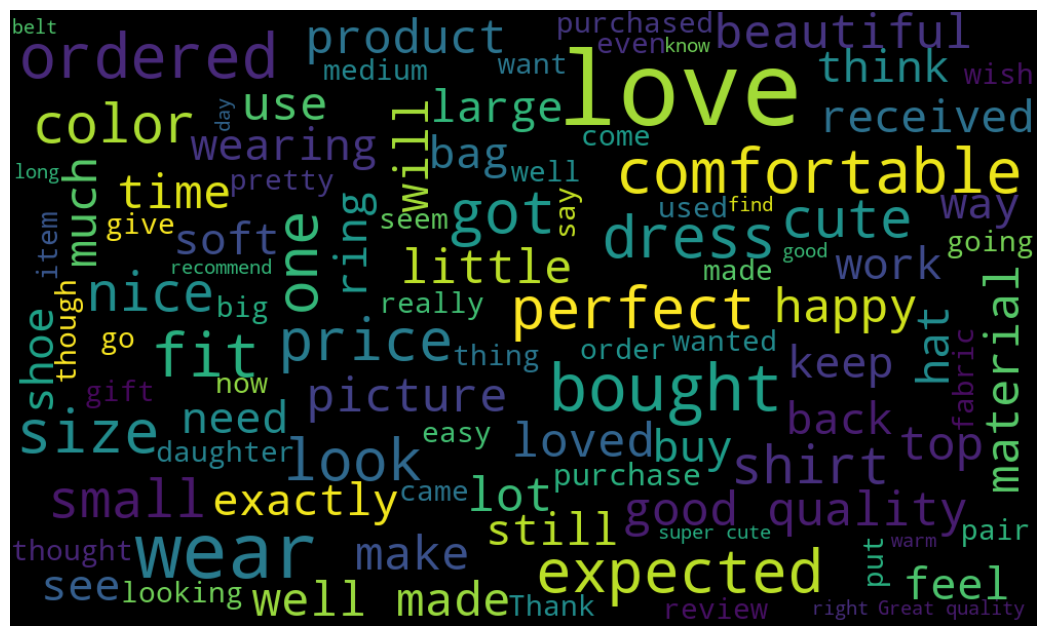

In [9]:
positive_senti = df2[df2['overall']=='positive']

positive_review = positive_senti[['reviewText']].dropna()

txt = ' '.join(rev for rev in positive_review.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

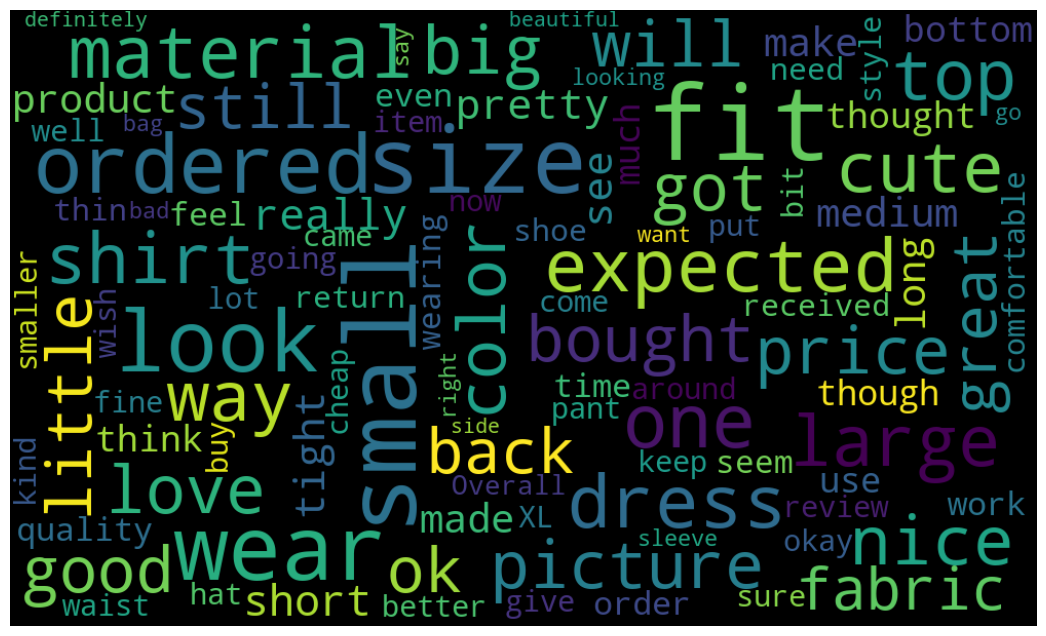

In [10]:
neutral_senti = df2[df2['overall']=='neutral']

neutral_review = neutral_senti[['reviewText']].dropna()

txt = ' '.join(rev for rev in neutral_review.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

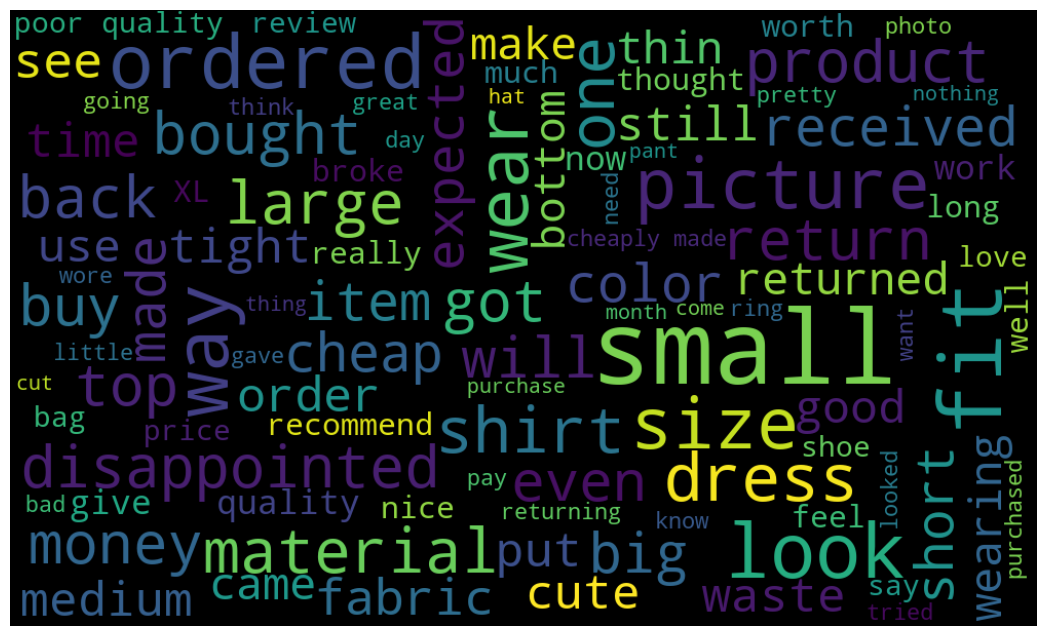

In [11]:
negative_senti = df2[df2['overall']=='negative']

negative_review = negative_senti[['reviewText']].dropna()

txt = ' '.join(rev for rev in negative_review.reviewText)
plt.figure(figsize=(15,8))

wordcloud = WordCloud(
            background_color = 'black',
            max_font_size = 100,
            max_words = 100,
            width = 1000,
            height = 600
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

## Product image visualization

The dataset contains 131809 prodcut images
Randomly display 16 images from the dataset:


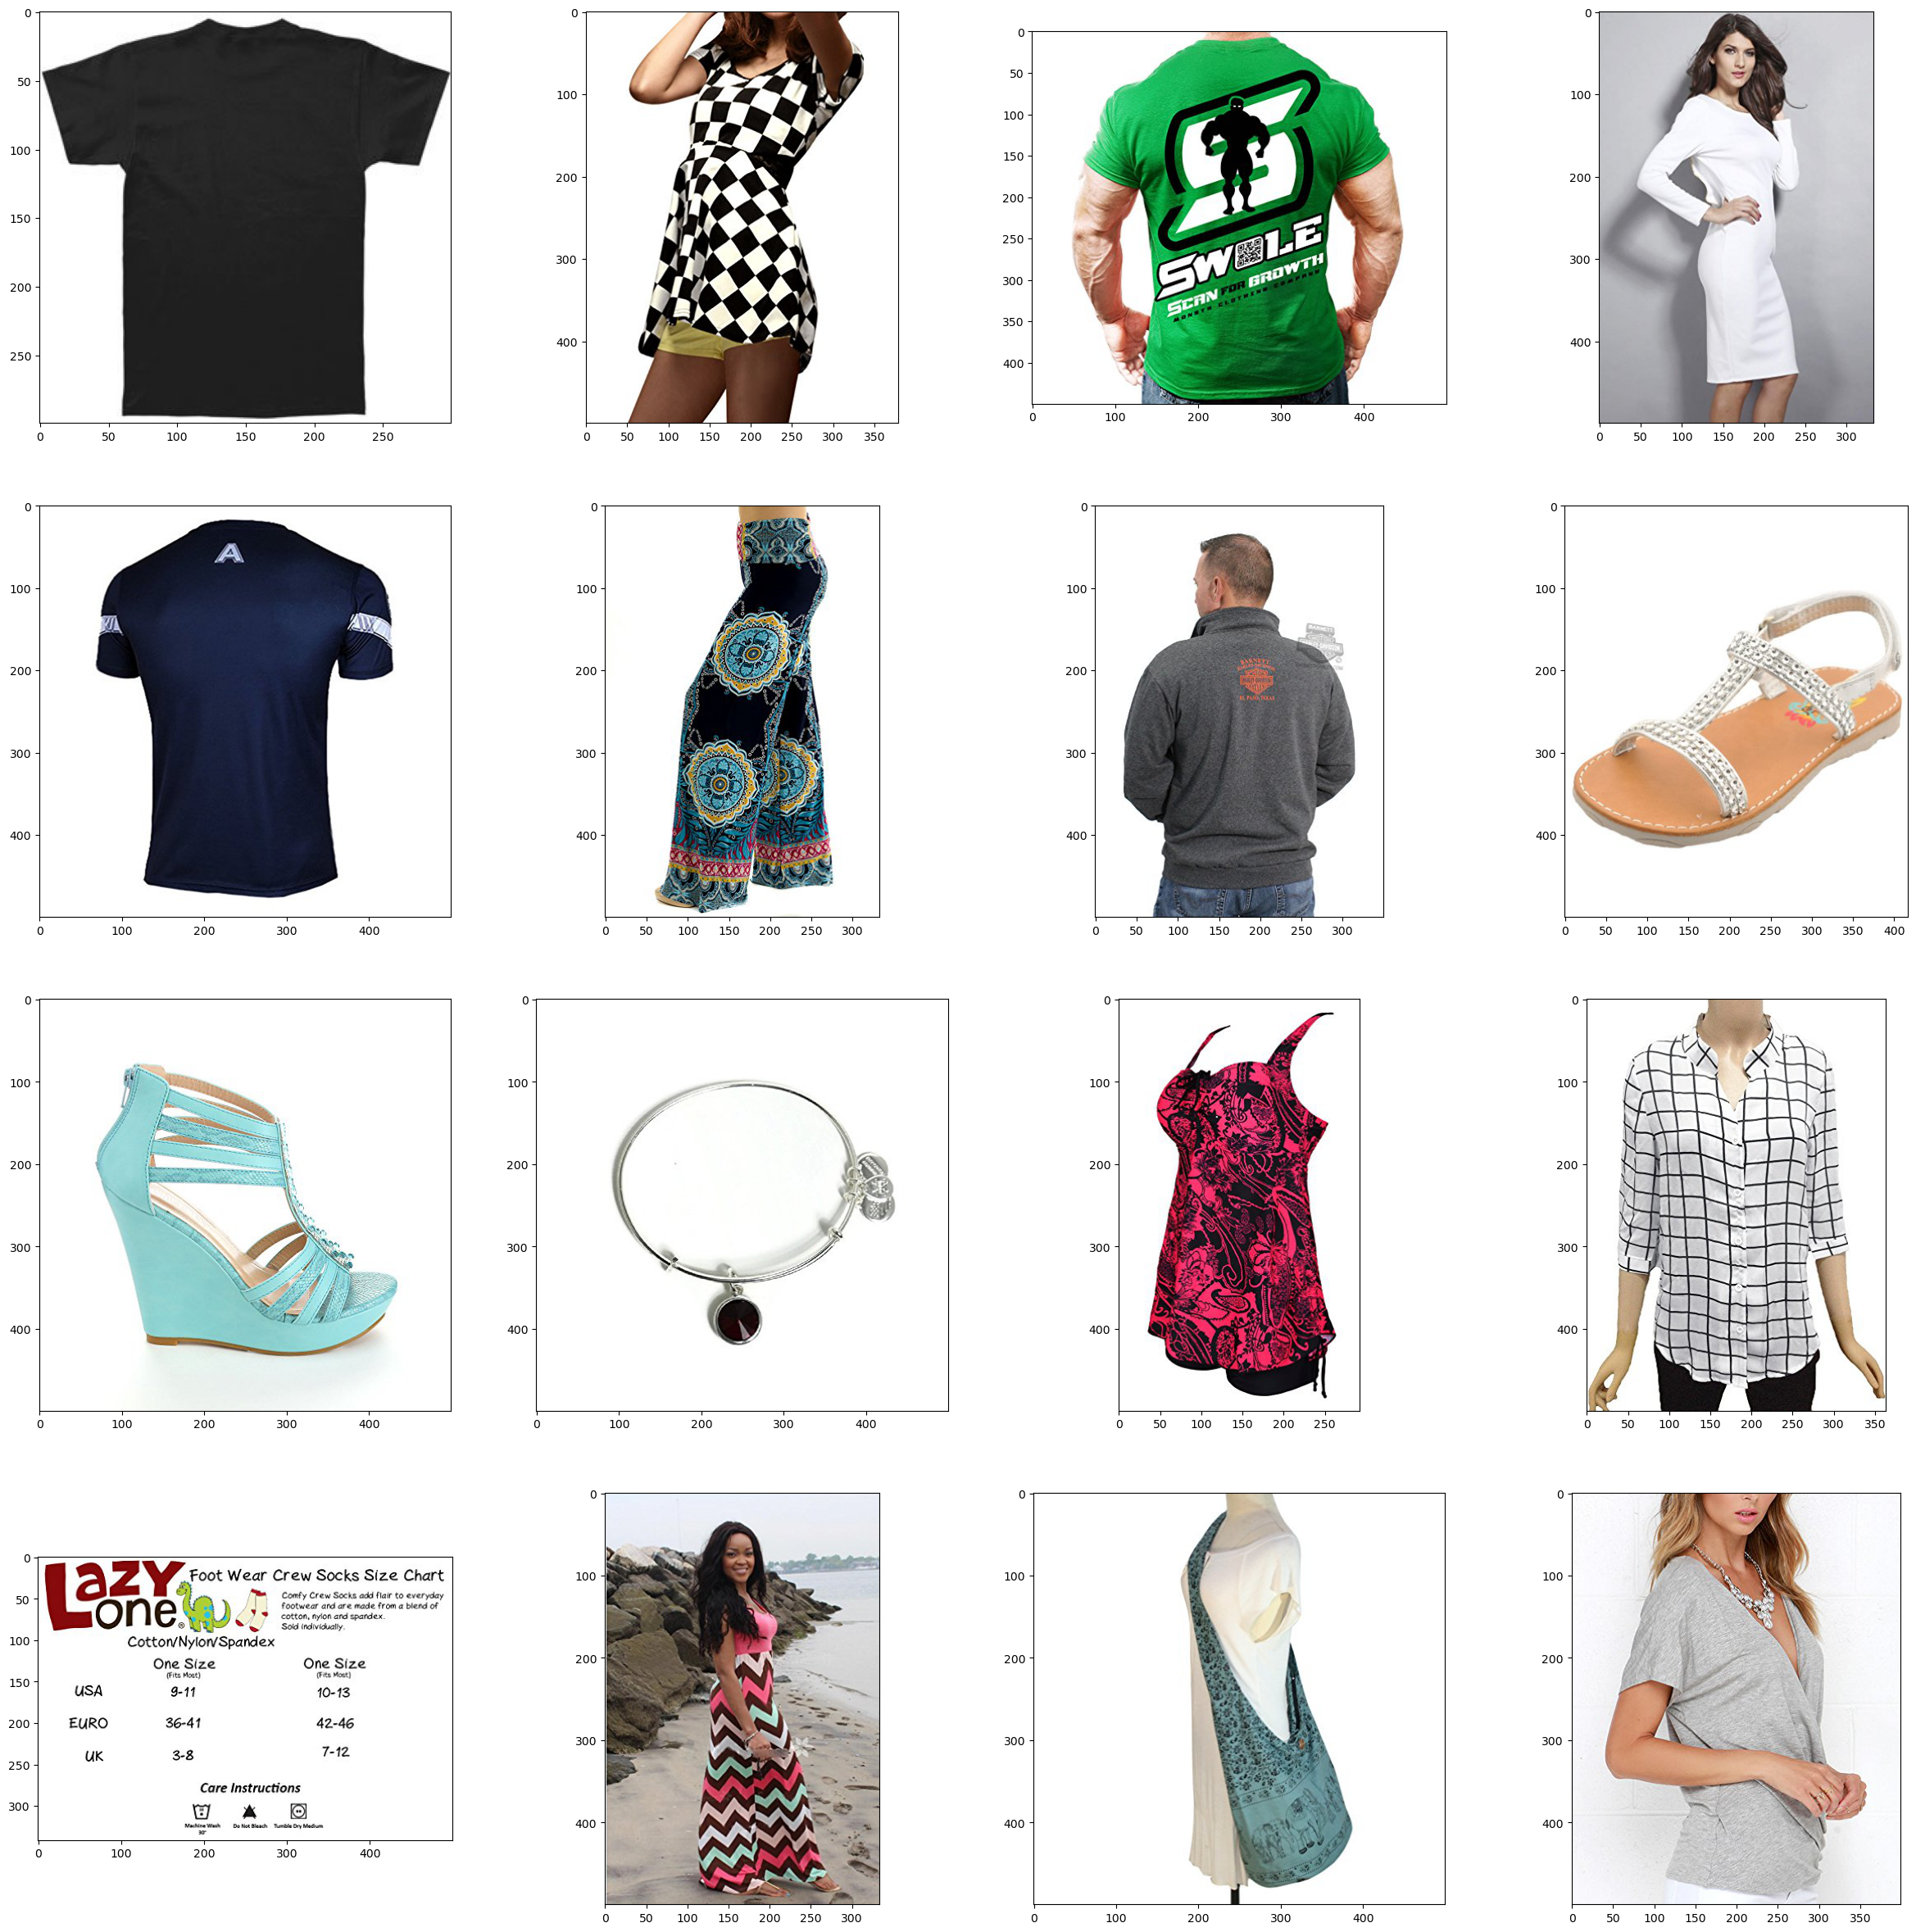

In [31]:
folder_path = './image_file/'

image_counts = len(os.listdir(folder_path))
print('The dataset contains',image_counts,'prodcut images')
print('Randomly display 16 images from the dataset:')

plt.figure(figsize=(30,30))    
for i in range(16):
    file = random.choice(os.listdir(folder_path))
    image_path = os.path.join(folder_path, file)
    img = mpimg.imread(image_path)
    ax = plt.subplot(4,4,i+1)
    plt.imshow(img)